## 1. Importação das Bibliotecas

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

## 2. Importação dos arquivos de treino, teste e validação

In [ ]:
from google.colab import files
files.upload()

## 3. Pré-Processamento

In [3]:
# Carregando os dados dos arquivos em um dataframe
train = pd.read_csv("train.csv", sep = ",")
test = pd.read_csv("test.csv", sep = ",")

In [49]:
train.shape

(34189, 15)

In [50]:
test.shape

(7327, 15)

In [4]:
# Concatenando os conjuntos de treino e de teste para poder fazer o
# pré-processamento uma única vez
df = pd.concat([train, test])

### 3.1. Conhecendo o conjunto de dados

In [5]:
# Visualizando uma parte aletória do conjunto para identificar valores
# não adequados
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
18827,65,Local-gov,205024,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,8,United-States,<=50K
12436,52,Private,174964,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
34179,38,Private,210610,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
3703,29,Private,203697,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,75,United-States,<=50K
27816,53,Private,132304,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,40,Scotland,<=50K
8555,57,Local-gov,190748,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,35,United-States,<=50K
2066,43,Private,112763,HS-grad,9,Never-married,Adm-clerical,Unmarried,White,Female,8614,0,43,United-States,>50K
18169,59,Private,169611,HS-grad,9,Divorced,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K
20451,37,Private,126569,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
10559,57,Self-emp-not-inc,149168,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,<=50K


In [6]:
df.shape

(41516, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41516 entries, 0 to 7326
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              41516 non-null  int64 
 1   workclass        41516 non-null  object
 2   fnlwgt           41516 non-null  int64 
 3   education        41516 non-null  object
 4   educational-num  41516 non-null  int64 
 5   marital-status   41516 non-null  object
 6   occupation       41516 non-null  object
 7   relationship     41516 non-null  object
 8   race             41516 non-null  object
 9   gender           41516 non-null  object
 10  capital-gain     41516 non-null  int64 
 11  capital-loss     41516 non-null  int64 
 12  hours-per-week   41516 non-null  int64 
 13  native-country   41516 non-null  object
 14  income           41516 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.1+ MB


In [8]:
# Removendo a variável 'education', pois já se tem os valores em formato
# numérico ('educational-num')
df.drop(columns = 'education', inplace = True)

In [9]:
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,188767,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
1,64,Private,286732,9,Widowed,Sales,Not-in-family,White,Female,0,0,17,United-States,<=50K
2,29,Private,253801,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Ecuador,<=50K
3,28,Private,334032,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
4,22,Private,173004,9,Never-married,Machine-op-inspct,Other-relative,Black,Male,0,0,1,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7322,42,Private,173704,10,Married-civ-spouse,Sales,Husband,White,Male,0,1887,50,United-States,>50K
7323,27,Private,220748,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,48,United-States,<=50K
7324,18,Private,186909,10,Never-married,Other-service,Own-child,White,Female,0,0,16,United-States,<=50K
7325,44,Self-emp-not-inc,127482,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,50,England,>50K


### 3.2. Tratamento de valores ausentes (NaN)

In [10]:
# Verificando o total de valores nulos
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
# Como verificado no item 3, alguns valores estão demarcados como '?'
# Verificando o total de valores '?'
df.isin(['?']).sum()

age                   0
workclass          2395
fnlwgt                0
educational-num       0
marital-status        0
occupation         2404
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      719
income                0
dtype: int64

In [12]:
# Verificando a moda em cada uma das categorias que possuem NaNs
df.groupby(['workclass']).size()

workclass
?                    2395
Federal-gov          1221
Local-gov            2667
Never-worked            9
Private             28822
Self-emp-inc         1445
Self-emp-not-inc     3271
State-gov            1667
Without-pay            19
dtype: int64

In [13]:
df.groupby(['occupation']).size()

occupation
?                    2404
Adm-clerical         4731
Armed-Forces           13
Craft-repair         5211
Exec-managerial      5166
Farming-fishing      1264
Handlers-cleaners    1731
Machine-op-inspct    2550
Other-service        4214
Priv-house-serv       212
Prof-specialty       5246
Protective-serv       835
Sales                4733
Tech-support         1194
Transport-moving     2012
dtype: int64

In [14]:
df.groupby(['native-country']).size()

native-country
?                               719
Cambodia                         26
Canada                          161
China                           109
Columbia                         74
Cuba                            108
Dominican-Republic               82
Ecuador                          35
El-Salvador                     128
England                          99
France                           33
Germany                         169
Greece                           43
Guatemala                        73
Haiti                            66
Holand-Netherlands                1
Honduras                         15
Hong                             24
Hungary                          16
India                           129
Iran                             55
Ireland                          30
Italy                            92
Jamaica                          92
Japan                            77
Laos                             19
Mexico                          812
Nicaragua    

In [15]:
# Atualizando os '?' com NaNs
df = df.replace('?', np.NaN)

In [16]:
# Atualizando os NaNs com a moda
df['workclass'].fillna('Private', inplace = True)
df['occupation'].fillna('Prof-specialty', inplace = True)
df['native-country'].fillna('United-States', inplace = True)

In [17]:
# Apresentando valores atualizados
display(df.iloc[30:41])

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
30,45,Self-emp-inc,61885,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,48,United-States,>50K
31,43,Private,160943,9,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,40,United-States,>50K
32,40,Private,309311,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
33,63,Private,133144,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,<=50K
34,34,Private,190027,9,Separated,Tech-support,Unmarried,Black,Female,0,0,35,United-States,<=50K
35,30,Private,190385,13,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States,>50K
36,32,Private,178449,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
37,61,Private,108398,7,Widowed,Prof-specialty,Unmarried,Black,Female,0,0,9,United-States,<=50K
38,51,Private,183390,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
39,57,Private,372020,10,Married-civ-spouse,Sales,Husband,White,Male,5013,0,50,United-States,<=50K


### 3.3. Label Encoding

In [18]:
# Criando um vetor com o nome das variáveis categóricas
categoricals = [
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'native-country',
    'income'
]

categoricals

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [19]:
# Criando um vetor com as variáveis numéricas
numericals = list(df.select_dtypes(include=['int64', 'float64']).columns)

numericals

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [20]:
# Transformando os valores para 'float'
var_float = df.loc[:, numericals].var()
for i in range(len(numericals)):
    print('{} \t\t {}'.format(numericals[i], round(float(var_float[i]), 3)))

age 		 188.325
fnlwgt 		 11103695307.934
educational-num 		 6.597
capital-gain 		 55428429.122
capital-loss 		 163413.523
hours-per-week 		 153.955


In [21]:
# Transformando as variáveis categóricas
label_encoder = LabelEncoder()
for i in categoricals:
  df[i] = pd.DataFrame(label_encoder.fit_transform(df[i]))

In [22]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,188767,9,4,2,3,4,1,0,0,40,38,0
1,64,3,286732,9,6,11,1,4,0,0,0,17,38,0
2,29,3,253801,9,2,2,0,4,1,0,0,40,6,0
3,28,3,334032,11,2,2,0,4,1,0,0,50,38,0
4,22,3,173004,9,4,6,2,2,1,0,0,1,38,0


### 3.4 Scaling

In [23]:
min_max_scaler = MinMaxScaler()

column_values = df.columns.values
column_values = column_values[:-1]

scaled_values = min_max_scaler.fit_transform(df[column_values])

for i in range(len(column_values)):
    df[column_values[i]] = scaled_values[:,i]

df.sample(10)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
26484,0.356164,0.857143,0.335532,0.800000,0.333333,0.692308,0.0,0.25,1.0,0.150242,0.0,0.397959,0.950,1
14113,0.561644,0.714286,0.160658,0.533333,0.333333,0.846154,0.0,1.00,1.0,0.150242,0.0,0.397959,0.950,1
10384,0.808219,0.714286,0.152533,0.533333,0.333333,0.153846,0.0,1.00,1.0,0.000000,0.0,0.295918,0.950,0
180,0.342466,0.428571,0.128510,0.866667,0.666667,0.153846,0.4,1.00,1.0,0.000000,0.0,0.653061,0.950,0
21913,0.095890,0.142857,0.162820,0.600000,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.724490,0.950,1
32370,0.301370,0.857143,0.208251,0.800000,0.333333,0.230769,0.0,1.00,1.0,0.000000,0.0,0.397959,0.950,0
1890,0.616438,0.714286,0.101846,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.346939,0.950,0
3369,0.123288,0.428571,0.065018,0.533333,0.666667,0.153846,0.6,1.00,1.0,0.033250,0.0,0.397959,0.950,0
1968,0.164384,0.428571,0.272349,0.733333,0.666667,0.846154,0.2,1.00,1.0,0.000000,0.0,0.448980,0.625,0
13136,0.424658,0.857143,0.072021,0.800000,0.333333,0.230769,0.0,1.00,1.0,0.051781,0.0,0.397959,0.950,1


### 3.5. Outliers


In [24]:
# Calculando o desvio padrão das variáveis numéricas
dp_age = df['age'].std()
dp_fnlwgt = df['fnlwgt'].std()
dp_capital_gain = df['capital-gain'].std()
dp_capital_loss = df['capital-loss'].std()
dp_hours_per_week = df['hours-per-week'].std()

print("Desvio Padrão 'age': ", dp_age)
print("Desvio Padrão 'fnlwgt': ", dp_fnlwgt)
print("Desvio Padrão 'capital-gain': ", dp_capital_gain)
print("Desvio Padrão 'capital-loss': ", dp_capital_loss)
print("Desvio Padrão 'hours-per-week': ", dp_hours_per_week)

Desvio Padrão 'age':  0.18798825721441056
Desvio Padrão 'fnlwgt':  0.0715652281445221
Desvio Padrão 'capital-gain':  0.07445101591432718
Desvio Padrão 'capital-loss':  0.09280174123558801
Desvio Padrão 'hours-per-week':  0.12661088247609256


#### 3.5.1. Visualizando os outliers

In [25]:
# Verificando se há outliers no conjunto
df.loc[df['age'] >= 3 * dp_age, 'age']

1       0.643836
6       0.630137
10      0.643836
23      0.643836
25      0.602740
          ...   
7262    0.712329
7266    0.753425
7276    0.630137
7313    0.602740
7314    0.616438
Name: age, Length: 3912, dtype: float64

<Figure size 800x500 with 0 Axes>

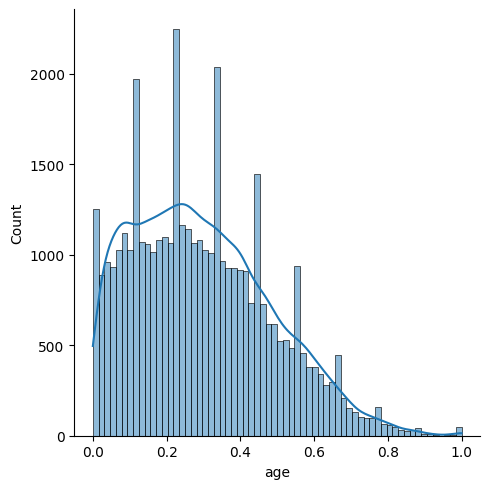

In [26]:
plt.figure(figsize=(8,5))
sns.displot(df['age'], kde = True)
plt.show()

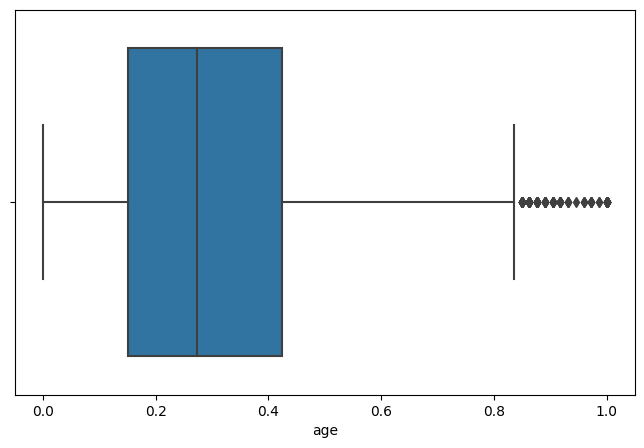

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x="age", data = df)
plt.show()

In [28]:
df.loc[df['fnlwgt'] >= 3 * dp_fnlwgt, 'fnlwgt']

3       0.218516
7       0.411462
15      0.235395
22      0.226623
39      0.244315
          ...   
7265    0.251070
7270    0.980121
7271    0.264224
7292    0.246275
7313    0.388458
Name: fnlwgt, Length: 4144, dtype: float64

<Figure size 800x500 with 0 Axes>

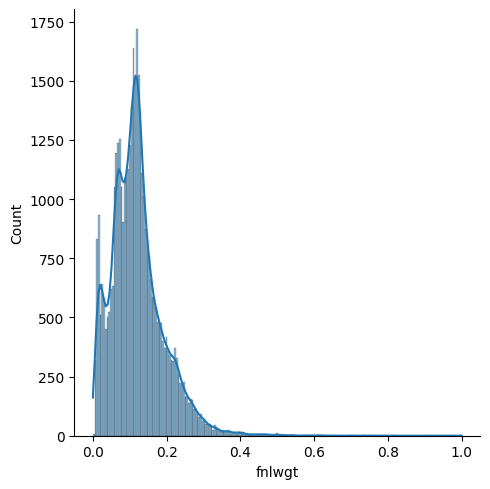

In [29]:
plt.figure(figsize=(8,5))
sns.displot(df['fnlwgt'], kde = True)
plt.show()

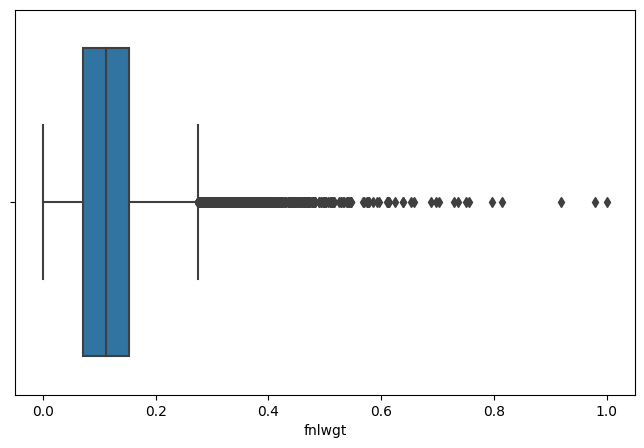

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x="fnlwgt", data = df)
plt.show()

In [31]:
df.loc[df['capital-gain'] >= 3 * dp_capital_gain, 'capital-gain']

62      1.000000
169     1.000000
233     1.000000
264     1.000000
488     1.000000
          ...   
6807    1.000000
6840    0.251243
6861    1.000000
6937    0.278283
7160    1.000000
Name: capital-gain, Length: 283, dtype: float64

<Figure size 800x500 with 0 Axes>

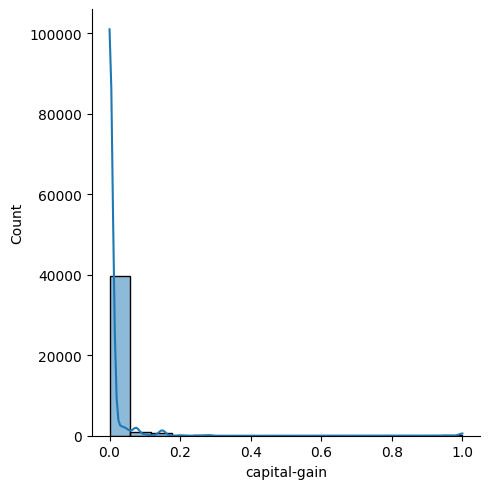

In [32]:
plt.figure(figsize=(8,5))
sns.displot(df['capital-gain'], kde = True)
plt.show()

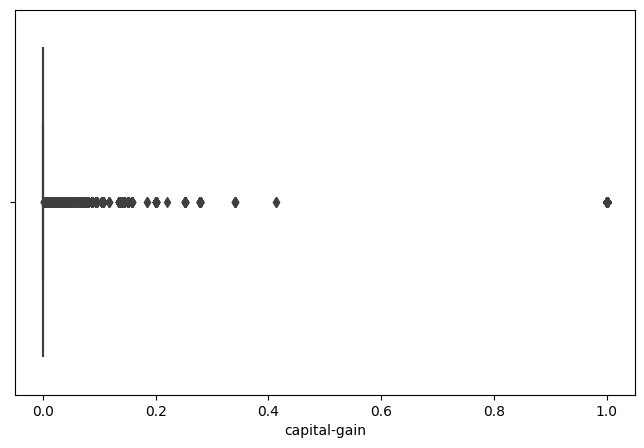

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x="capital-gain", data = df)
plt.show()

In [34]:
df.loc[df['capital-loss'] >= 3 * dp_capital_loss, 'capital-loss']

29      0.554408
41      0.430670
82      0.433196
87      0.518365
101     0.436639
          ...   
7253    0.587466
7279    0.399449
7285    0.399679
7286    0.436639
7322    0.433196
Name: capital-loss, Length: 1909, dtype: float64

<Figure size 800x500 with 0 Axes>

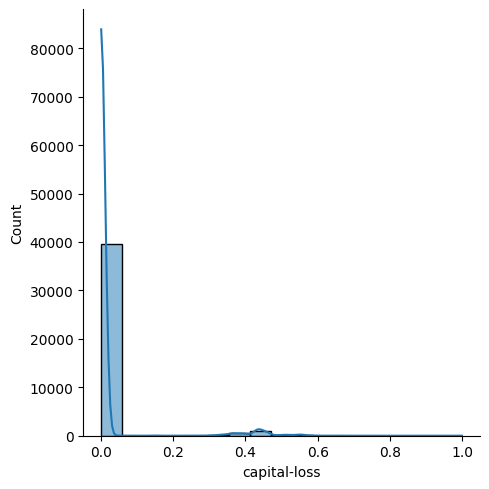

In [35]:
plt.figure(figsize=(8,5))
sns.displot(df['capital-loss'], kde = True)
plt.show()

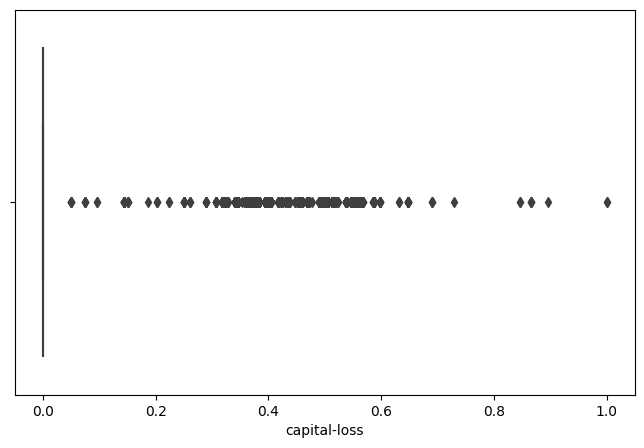

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x="capital-loss", data = df)
plt.show()

In [37]:
df.loc[df['hours-per-week'] >= 3 * dp_hours_per_week, 'hours-per-week']

0       0.397959
2       0.397959
3       0.500000
5       0.642857
7       0.397959
          ...   
7321    0.397959
7322    0.500000
7323    0.479592
7325    0.500000
7326    0.397959
Name: hours-per-week, Length: 31637, dtype: float64

<Figure size 800x500 with 0 Axes>

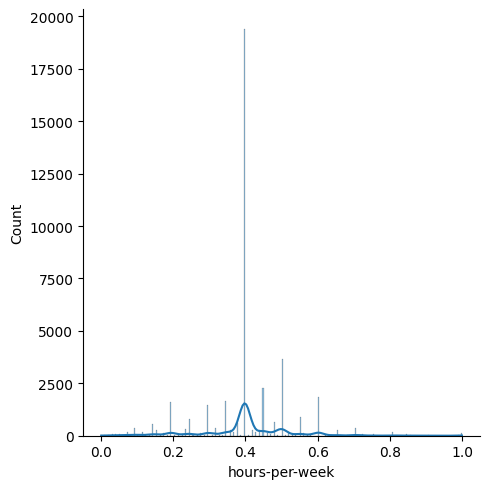

In [38]:
plt.figure(figsize=(8,5))
sns.displot(df['hours-per-week'], kde = True)
plt.show()

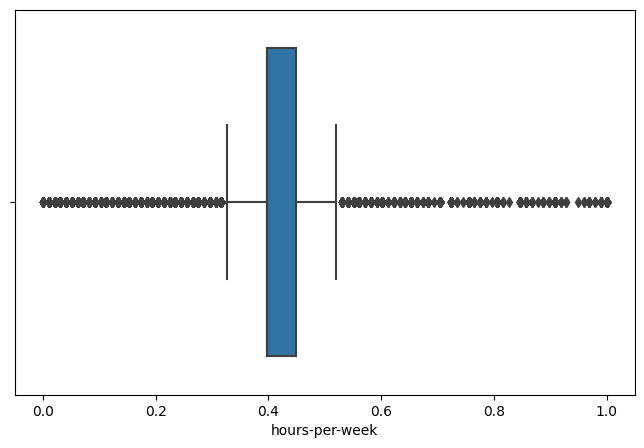

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x="hours-per-week", data = df)
plt.show()

#### 3.5.2. Tratando os outliers

In [40]:
# Função para definir os limites (inferior e superior) de uma varável
def outlier_bounds(column):
  Q1, Q3 = np.percentile(column, [25, 75])
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  return lower_bound, upper_bound

In [41]:
# Definindo limites inferior e superior para a variável 'age'
lower_bound, upper_bound = outlier_bounds(df['age'])

print("Limite inferior 'age': ", lower_bound)
print("Limite superior 'age': ", upper_bound)

Limite inferior 'age':  -0.2602739726027397
Limite superior 'age':  0.8356164383561644


In [42]:
# Definindo as linhas que possuem outliers para a variável 'age'
df[(df.age < lower_bound) | (df.age > upper_bound)]

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
110,0.890411,0.428571,0.011652,0.200000,1.000000,0.692308,0.2,1.0,1.0,0.000000,0.0,0.040816,0.95,0
680,0.849315,0.428571,0.060170,0.733333,0.333333,0.692308,1.0,1.0,0.0,0.000000,0.0,0.010204,0.95,1
687,0.904110,0.428571,0.122261,0.600000,0.000000,0.692308,0.8,1.0,0.0,0.000000,0.0,0.193878,0.95,0
956,0.863014,0.714286,0.011652,0.200000,0.500000,0.307692,0.8,1.0,1.0,0.000000,0.0,0.142857,0.95,0
1032,0.876712,0.428571,0.058292,0.800000,1.000000,0.846154,0.2,1.0,1.0,0.000000,0.0,0.500000,0.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,0.876712,0.000000,0.117138,0.600000,0.333333,0.000000,1.0,1.0,0.0,0.000000,0.0,0.244898,0.95,1
6487,0.917808,0.714286,0.242213,0.133333,0.666667,0.461538,0.2,1.0,1.0,0.000000,0.0,0.142857,0.95,0
6599,0.849315,0.428571,0.057590,0.466667,0.666667,0.769231,0.2,0.5,0.0,0.184812,0.0,0.448980,0.95,1
6710,1.000000,0.571429,0.119502,0.533333,0.666667,0.230769,0.2,1.0,1.0,0.116781,0.0,0.397959,0.95,0


In [43]:
# Atualizando o valor do vetor 'numericals', desconsiderando 'capital-gain' e
# 'capital-loss' do tratamento de outliers, pois possuem valores esparsos
numericals.remove('capital-gain')
numericals.remove('capital-loss')
numericals

['age', 'fnlwgt', 'educational-num', 'hours-per-week']

In [44]:
# Tratamento dos outliers
for i in numericals:
  lower_bound, upper_bound = outlier_bounds(df[i])
  median = df[i].median()
  df.loc[(df[i] < lower_bound) | (df[i] > upper_bound), i] = median
  print('Variável \'{}\'\nOutliers: {}\n'.format(i, df[
    (df[i] < lower_bound) | (df[i] > upper_bound)][i]))

Variável 'age'
Outliers: Series([], Name: age, dtype: float64)

Variável 'fnlwgt'
Outliers: Series([], Name: fnlwgt, dtype: float64)

Variável 'educational-num'
Outliers: Series([], Name: educational-num, dtype: float64)

Variável 'hours-per-week'
Outliers: Series([], Name: hours-per-week, dtype: float64)



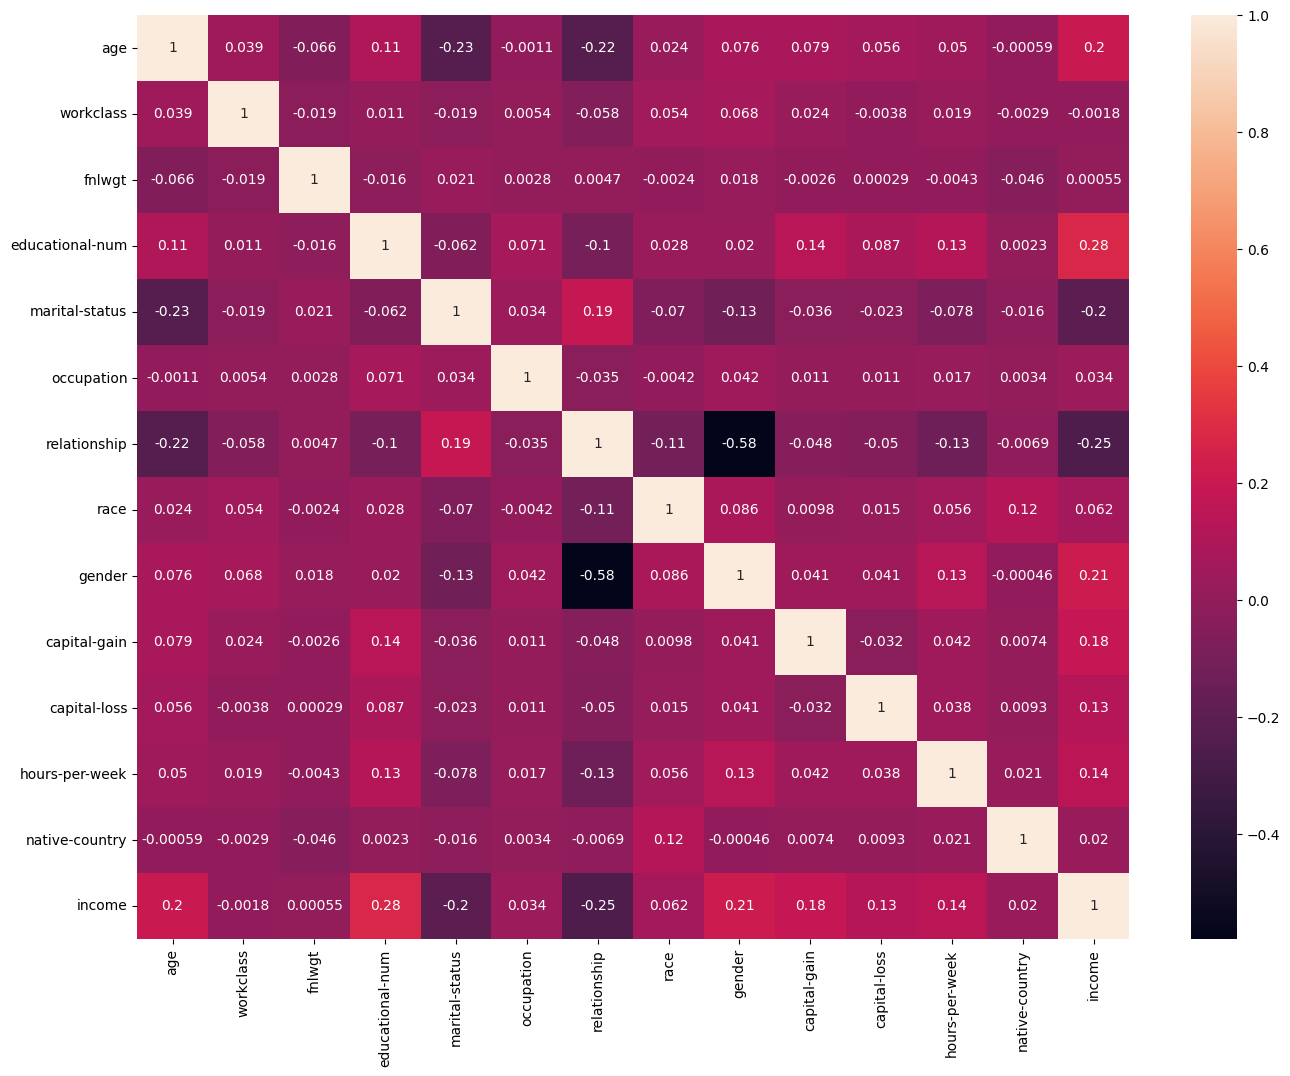

In [45]:
# Mapa de Calor de Correlação (Correlation Heatmap)
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.heatmap(df.corr(), annot = True)

# Nenhuma correlação foi maior que 0.7 ou menor que -0.7;
# portanto, pode-se afirmar que não correlação entre as variáveis

In [46]:
# Criando os conjuntos de treino e de test
X = df.iloc[:,:-1] # ou X = all_columns[:-1]
y = df['income']

print(X)
print(y.shape)

           age  workclass    fnlwgt  educational-num  marital-status  \
0     0.109589   0.428571  0.119858         0.533333        0.666667   
1     0.643836   0.428571  0.186392         0.533333        1.000000   
2     0.164384   0.428571  0.164027         0.533333        0.333333   
3     0.150685   0.428571  0.218516         0.666667        0.333333   
4     0.068493   0.428571  0.109153         0.533333        0.666667   
...        ...        ...       ...              ...             ...   
7322  0.342466   0.000000  0.109628         0.600000        0.333333   
7323  0.136986   0.857143  0.141578         0.533333        0.333333   
7324  0.013699   0.428571  0.118597         0.600000        0.666667   
7325  0.369863   0.428571  0.078237         0.533333        0.333333   
7326  0.301370   0.428571  0.180891         0.533333        0.333333   

      occupation  relationship  race  gender  capital-gain  capital-loss  \
0       0.153846           0.6   1.0     1.0      0.000000 

### 4. Treinamento

### 4.1. Divisão do conjunto de dados em treino e teste

In [51]:
# Dividindo o dataframe em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22)

# Quando os dados foram concatenados, treino tinha 34189 registros e teste tinha
# 7327 registros. Para manter a proporção, optou-se por dividir em 78% e 22%
# (arredondando-se)

In [52]:
# Verificando a divisão dos conjuntos de treino e teste
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32382, 13) (9134, 13) (32382,) (9134,)


### 4.2. Modelos

#### 4.2.1. Logistic Regression (Regressão Logística)

In [55]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

LogisticRegression()

In [56]:
logistic_train_score = logistic_regressor.score(X_train, y_train)
logistic_test_score = logistic_regressor.score(X_test, y_test)
logistic_prediction = logistic_regressor.predict(X_test)

print('Train Score: {0}\nTest Score: {1}'.format(logistic_train_score, logistic_test_score))

Train Score: 0.8015564202334631
Test Score: 0.7939566455003284


In [92]:
logistic_as = accuracy_score(y_test, logistic_prediction)
logistic_f1 = f1_score(y_test, logistic_prediction)
logistic_rs = recall_score(y_test, logistic_prediction)
logistic_cm = confusion_matrix(y_test, logistic_prediction)

print(f'Accuracy Score:\n{logistic_as}\n')
print(f'F1 Score:\n{logistic_f1}\n')
print(f'Recall Score:\n{logistic_rs}\n')
print(f'Confusion Matrix:\n{logistic_cm}\n')

Accuracy Score:
0.7939566455003284

F1 Score:
0.44809384164222876

Recall Score:
0.3398576512455516

Confusion Matrix:
[[6488  398]
 [1484  764]]



#### 4.2.2 K-Nearest Neighbors Classifier (K-ésimo Vizinho mais Próximo)

In [79]:
error_rate = []
k_values = list(filter(lambda x: x%2 == 1, range(0, 50)))
best_k = 0

for i in k_values:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
print(error_rate.index(np.min(error_rate)))

15


Text(0, 0.5, 'Taxa de Erro')

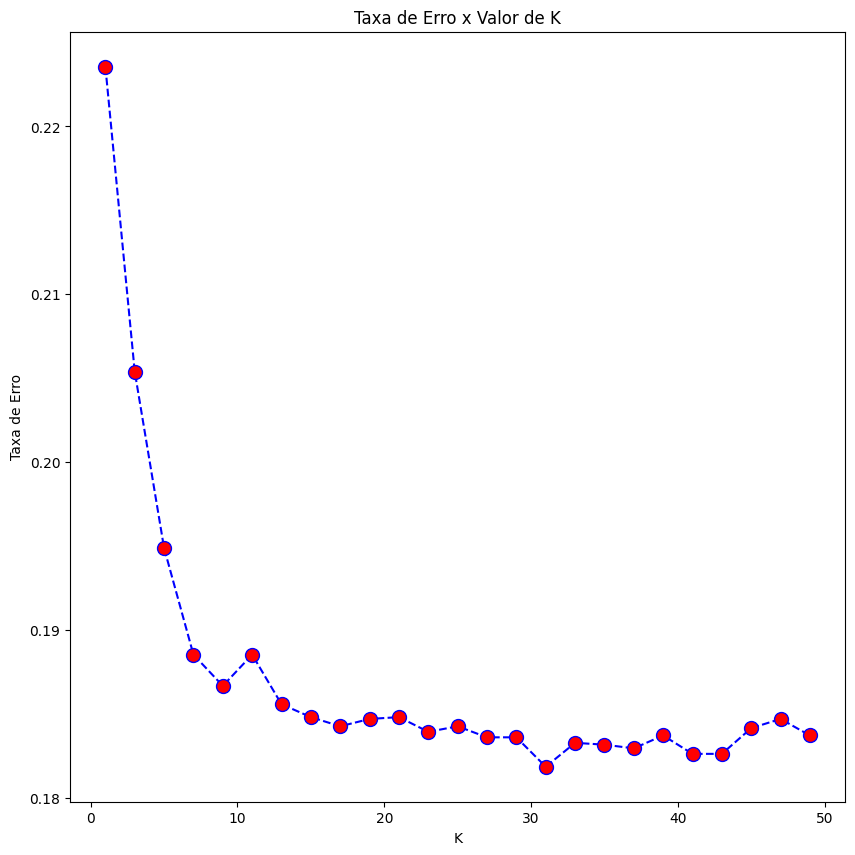

In [80]:
plt.figure(figsize=(10,10))
plt.plot(k_values, error_rate,color = 'blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize = 10)
plt.title('Taxa de Erro x Valor de K')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')

In [97]:
# 2 * index + 1, o index vale 15, como verificado acima
knn = KNeighborsClassifier(n_neighbors = 31)
modelo = knn.fit(X, y)

In [98]:
knn_prev = modelo.predict(X)
print(knn_prev)

[0 0 0 ... 0 1 0]


In [99]:
accuracy = accuracy_score(y, knn_prev)
precision = precision_score(y, knn_prev, average = 'weighted')
recall = recall_score(y, knn_prev, average = 'weighted')
f1 = f1_score(y, knn_prev, average = 'weighted')
cm = confusion_matrix(y, knn_prev)

print(f'Accuracy Score:\n{accuracy}\n')
print(f'F1 Score:\n{f1}\n')
print(f'Recall Score:\n{recall}\n')
print(f'Confusion Matrix:\n{cm}\n')

Accuracy Score:
0.8308122169765874

F1 Score:
0.8215796366052232

Recall Score:
0.8308122169765874

Confusion Matrix:
[[29249  2208]
 [ 4816  5243]]



#### 4.2.3 Support Vector Classifier (Máquina de Vetores de Suporte)

In [89]:
svc = SVC(kernel = 'rbf')
svc.fit(X_train, y_train)

SVC()

In [95]:
y_prev = svc.predict(X_test)
print(y_prev)

[0 0 0 ... 0 0 0]


In [100]:
accuracy = accuracy_score(y_test, y_prev)
precision = precision_score(y_test, y_prev, average = 'weighted')
recall = recall_score(y_test, y_prev, average = 'weighted')
f1 = f1_score(y_test, y_prev, average = 'weighted')
cm = confusion_matrix(y_test, y_prev)

print(f'Accuracy Score:\n{accuracy}\n')
print(f'F1 Score:\n{f1}\n')
print(f'Recall Score:\n{recall}\n')
print(f'Confusion Matrix:\n{cm}\n')

Accuracy Score:
0.8182614407707467

F1 Score:
0.800678045487958

Recall Score:
0.8182614407707467

Confusion Matrix:
[[6514  372]
 [1288  960]]



#### 4.2.4 Decision Tree (Árvore de Decisão)

In [107]:
modelo = DecisionTreeClassifier(random_state = 1, max_depth = 8, max_leaf_nodes = 2)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=2, random_state=1)

In [108]:
y_prev = modelo.predict(X_test)

In [113]:
accuracy = accuracy_score(y_test, y_prev)
precision = precision_score(y_test, y_prev, average = 'weighted', zero_division = 1)
recall = recall_score(y_test, y_prev, average = 'weighted')
f1 = f1_score(y_test, y_prev, average = 'weighted')
cm = confusion_matrix(y_test, y_prev)

print(f'Accuracy Score:\n{accuracy}\n')
print(f'F1 Score:\n{f1}\n')
print(f'Recall Score:\n{recall}\n')
print(f'Confusion Matrix:\n{cm}\n')

Accuracy Score:
0.7538865776220713

F1 Score:
0.6480977495013213

Recall Score:
0.7538865776220713

Confusion Matrix:
[[6886    0]
 [2248    0]]



#### 4.2.5. Neural Networks (Redes Neurais)

In [124]:
model = Sequential()
model.add(Dense(units = 64, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [125]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1012/1012 [==============================] - 3s 3ms/step - loss: 0.3808 - accuracy: 0.8228
Epoch 2/100
1012/1012 [==============================] - 2s 2ms/step - loss: 0.3802 - accuracy: 0.8222
Epoch 3/100
1012/1012 [==============================] - 2s 2ms/step - loss: 0.3791 - accuracy: 0.8238
Epoch 4/100
1012/1012 [==============================] - 6s 6ms/step - loss: 0.3819 - accuracy: 0.8199
Epoch 5/100
1012/1012 [==============================] - 2s 2ms/step - loss: 0.3810 - accuracy: 0.8205
Epoch 6/100
1012/1012 [==============================] - 3s 2ms/step - loss: 0.3809 - accuracy: 0.8230
Epoch 7/100
1012/1012 [==============================] - 2s 2ms/step - loss: 0.3819 - accuracy: 0.8214
Epoch 8/100
1012/1012 [==============================] - 3s 3ms/step - loss: 0.3812 - accuracy: 0.8225
Epoch 9/100
1012/1012 [==============================] - 2s 2ms/step - loss: 0.3805 - accuracy: 0.8214
Epoch 10/100
1012/1012 [==============================] - 2s 2ms/step - l

In [126]:
previsoes = model.predict(X_test)
previsoes

286/286 [==============================] - 1s 2ms/step


array([[0.50871813],
       [0.50907516],
       [0.49403048],
       ...,
       [0.5137208 ],
       [0.5028211 ],
       [0.50486183]], dtype=float32)

In [127]:
y_prev = (previsoes > 0.5).astype('int32')
y_prev

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [128]:
accuracy = accuracy_score(y_test, y_prev)
precision = precision_score(y_test, y_prev, average = 'weighted', zero_division = 1)
recall = recall_score(y_test, y_prev, average = 'weighted')
f1 = f1_score(y_test, y_prev, average = 'weighted')
cm = confusion_matrix(y_test, y_prev)

print(f'Accuracy Score:\n{accuracy}\n')
print(f'F1 Score:\n{f1}\n')
print(f'Recall Score:\n{recall}\n')
print(f'Confusion Matrix:\n{cm}\n')

Accuracy Score:
0.44701116706809724

F1 Score:
0.47940363591795876

Recall Score:
0.44701116706809724

Confusion Matrix:
[[2805 4081]
 [ 970 1278]]

